# Support Vector Machines (SVM) Tutorial

## Introduction
Support Vector Machines are powerful supervised learning algorithms used for classification and regression. SVMs work by finding the optimal hyperplane that separates different classes with maximum margin.

### Key Concepts:
1. **Hinge Loss**: The loss function used by SVMs
2. **Kernels**: Functions that transform data to higher dimensions
3. **Support Vectors**: Data points closest to the decision boundary
4. **Margin**: Distance between decision boundary and nearest data points

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.datasets import make_classification, make_circles, make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_palette("husl")

print("Support Vector Machines (SVM) Tutorial")
print("=" * 50)
print("We'll explore:")
print("1. Linear SVM with different C parameters")
print("2. Hinge loss visualization")
print("3. Different kernel functions")
print("4. Decision boundaries")

Support Vector Machines (SVM) Tutorial
We'll explore:
1. Linear SVM with different C parameters
2. Hinge loss visualization
3. Different kernel functions
4. Decision boundaries



HINGE LOSS VISUALIZATION


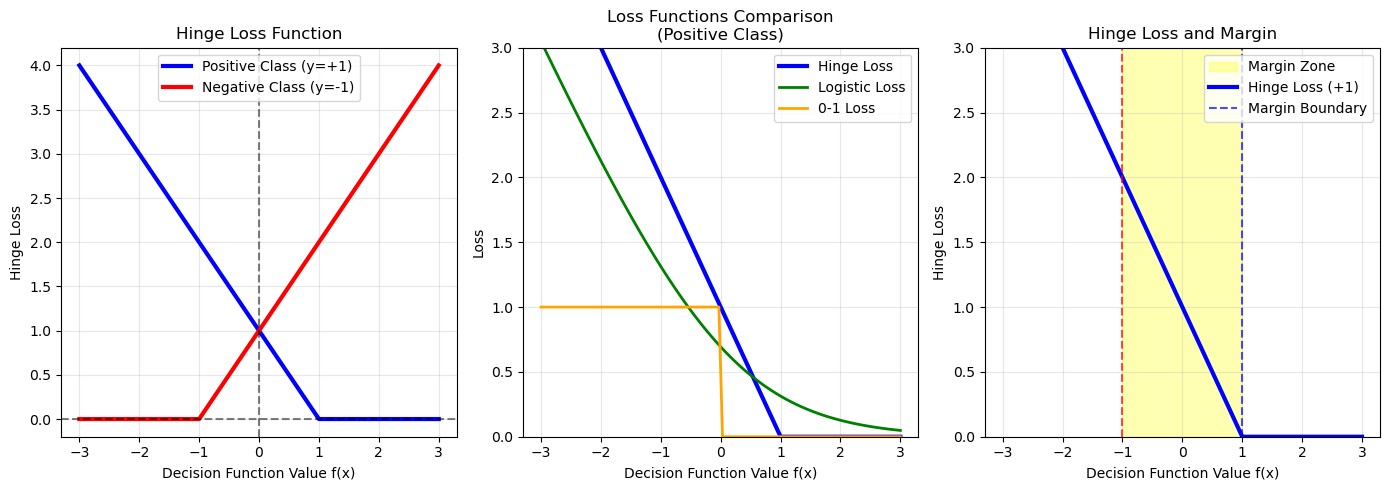


Key Insights about Hinge Loss:
• Loss = 0 when prediction is correct AND confident (margin ≥ 1)
• Loss increases linearly as confidence decreases
• Encourages maximum margin separation
• Non-differentiable at f(x) = 1 (but subgradient exists)


In [2]:
# 1. UNDERSTANDING HINGE LOSS
print("\nHINGE LOSS VISUALIZATION")
print("=" * 40)

def hinge_loss(y_true, decision_function):
    """
    Calculate hinge loss for SVM
    Hinge Loss = max(0, 1 - y * f(x))
    where y is true label (+1 or -1) and f(x) is decision function value
    """
    return np.maximum(0, 1 - y_true * decision_function)

# Create range of decision function values
decision_values = np.linspace(-3, 3, 100)

# Calculate hinge loss for positive class (y=+1) and negative class (y=-1)
hinge_positive = hinge_loss(1, decision_values)
hinge_negative = hinge_loss(-1, decision_values)

# Plot hinge loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.plot(decision_values, hinge_positive, 'b-', linewidth=3, label='Positive Class (y=+1)')
plt.plot(decision_values, hinge_negative, 'r-', linewidth=3, label='Negative Class (y=-1)')
plt.xlabel('Decision Function Value f(x)')
plt.ylabel('Hinge Loss')
plt.title('Hinge Loss Function')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)

# Compare with other loss functions
plt.subplot(1, 3, 2)
# For positive class comparison
logistic_loss = np.log(1 + np.exp(-decision_values))
zero_one_loss = (decision_values < 0).astype(float)

plt.plot(decision_values, hinge_positive, 'b-', linewidth=3, label='Hinge Loss')
plt.plot(decision_values, logistic_loss, 'g-', linewidth=2, label='Logistic Loss')
plt.plot(decision_values, zero_one_loss, 'orange', linewidth=2, label='0-1 Loss')
plt.xlabel('Decision Function Value f(x)')
plt.ylabel('Loss')
plt.title('Loss Functions Comparison\n(Positive Class)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 3)

# Margin illustration
plt.subplot(1, 3, 3)
margin_zone = np.abs(decision_values) <= 1
plt.fill_between(decision_values, 0, 3, where=margin_zone, 
                alpha=0.3, color='yellow', label='Margin Zone')
plt.plot(decision_values, hinge_positive, 'b-', linewidth=3, label='Hinge Loss (+1)')
plt.axvline(x=1, color='b', linestyle='--', alpha=0.7, label='Margin Boundary')
plt.axvline(x=-1, color='r', linestyle='--', alpha=0.7)
plt.xlabel('Decision Function Value f(x)')
plt.ylabel('Hinge Loss')
plt.title('Hinge Loss and Margin')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 3)

plt.tight_layout()
plt.show()

print("\nKey Insights about Hinge Loss:")
print("• Loss = 0 when prediction is correct AND confident (margin ≥ 1)")
print("• Loss increases linearly as confidence decreases")
print("• Encourages maximum margin separation")
print("• Non-differentiable at f(x) = 1 (but subgradient exists)")


LINEAR SVM WITH DIFFERENT C VALUES


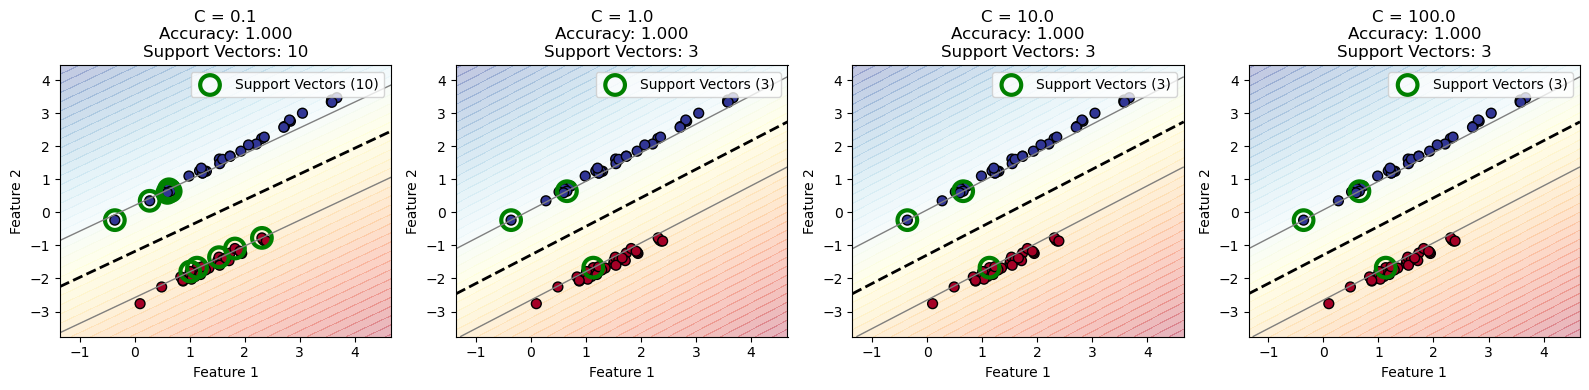


Effect of C Parameter:
• Low C (0.1): More regularization, wider margin, more support vectors
• High C (100): Less regularization, narrower margin, fewer support vectors
• C controls the trade-off between margin maximization and training error


In [3]:
# 2. LINEAR SVM WITH DIFFERENT C PARAMETERS
print("\nLINEAR SVM WITH DIFFERENT C VALUES")
print("=" * 45)

# Create a linearly separable dataset
np.random.seed(42)
X_linear, y_linear = make_classification(n_samples=100, n_features=2, n_redundant=0, 
                                       n_informative=2, n_clusters_per_class=1, 
                                       class_sep=1.5, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_linear, y_linear, test_size=0.3, random_state=42)

# Different C values to demonstrate regularization effect
C_values = [0.1, 1.0, 10.0, 100.0]

plt.figure(figsize=(16, 4))

for i, C in enumerate(C_values):
    plt.subplot(1, 4, i+1)
    
    # Train SVM with different C values
    svm_model = svm.SVC(kernel='linear', C=C)
    svm_model.fit(X_train, y_train)
    
    # Create a mesh to plot decision boundary
    h = 0.02
    x_min, x_max = X_linear[:, 0].min() - 1, X_linear[:, 0].max() + 1
    y_min, y_max = X_linear[:, 1].min() - 1, X_linear[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Plot decision boundary
    Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, levels=50, alpha=0.3, cmap='RdYlBu')
    plt.contour(xx, yy, Z, levels=[0], colors='black', linestyles='--', linewidths=2)
    plt.contour(xx, yy, Z, levels=[-1, 1], colors='gray', linestyles='-', linewidths=1)
    
    # Plot data points
    scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
                         cmap='RdYlBu', edgecolors='black', s=50)
    
    # Highlight support vectors
    support_vectors = svm_model.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
               s=200, facecolors='none', edgecolors='green', linewidth=3,
               label=f'Support Vectors ({len(support_vectors)})')
    
    # Calculate accuracy
    accuracy = svm_model.score(X_test, y_test)
    
    plt.title(f'C = {C}\nAccuracy: {accuracy:.3f}\nSupport Vectors: {len(support_vectors)}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

plt.tight_layout()
plt.show()

print("\nEffect of C Parameter:")
print("• Low C (0.1): More regularization, wider margin, more support vectors")
print("• High C (100): Less regularization, narrower margin, fewer support vectors")
print("• C controls the trade-off between margin maximization and training error")


KERNEL FUNCTIONS DEMONSTRATION


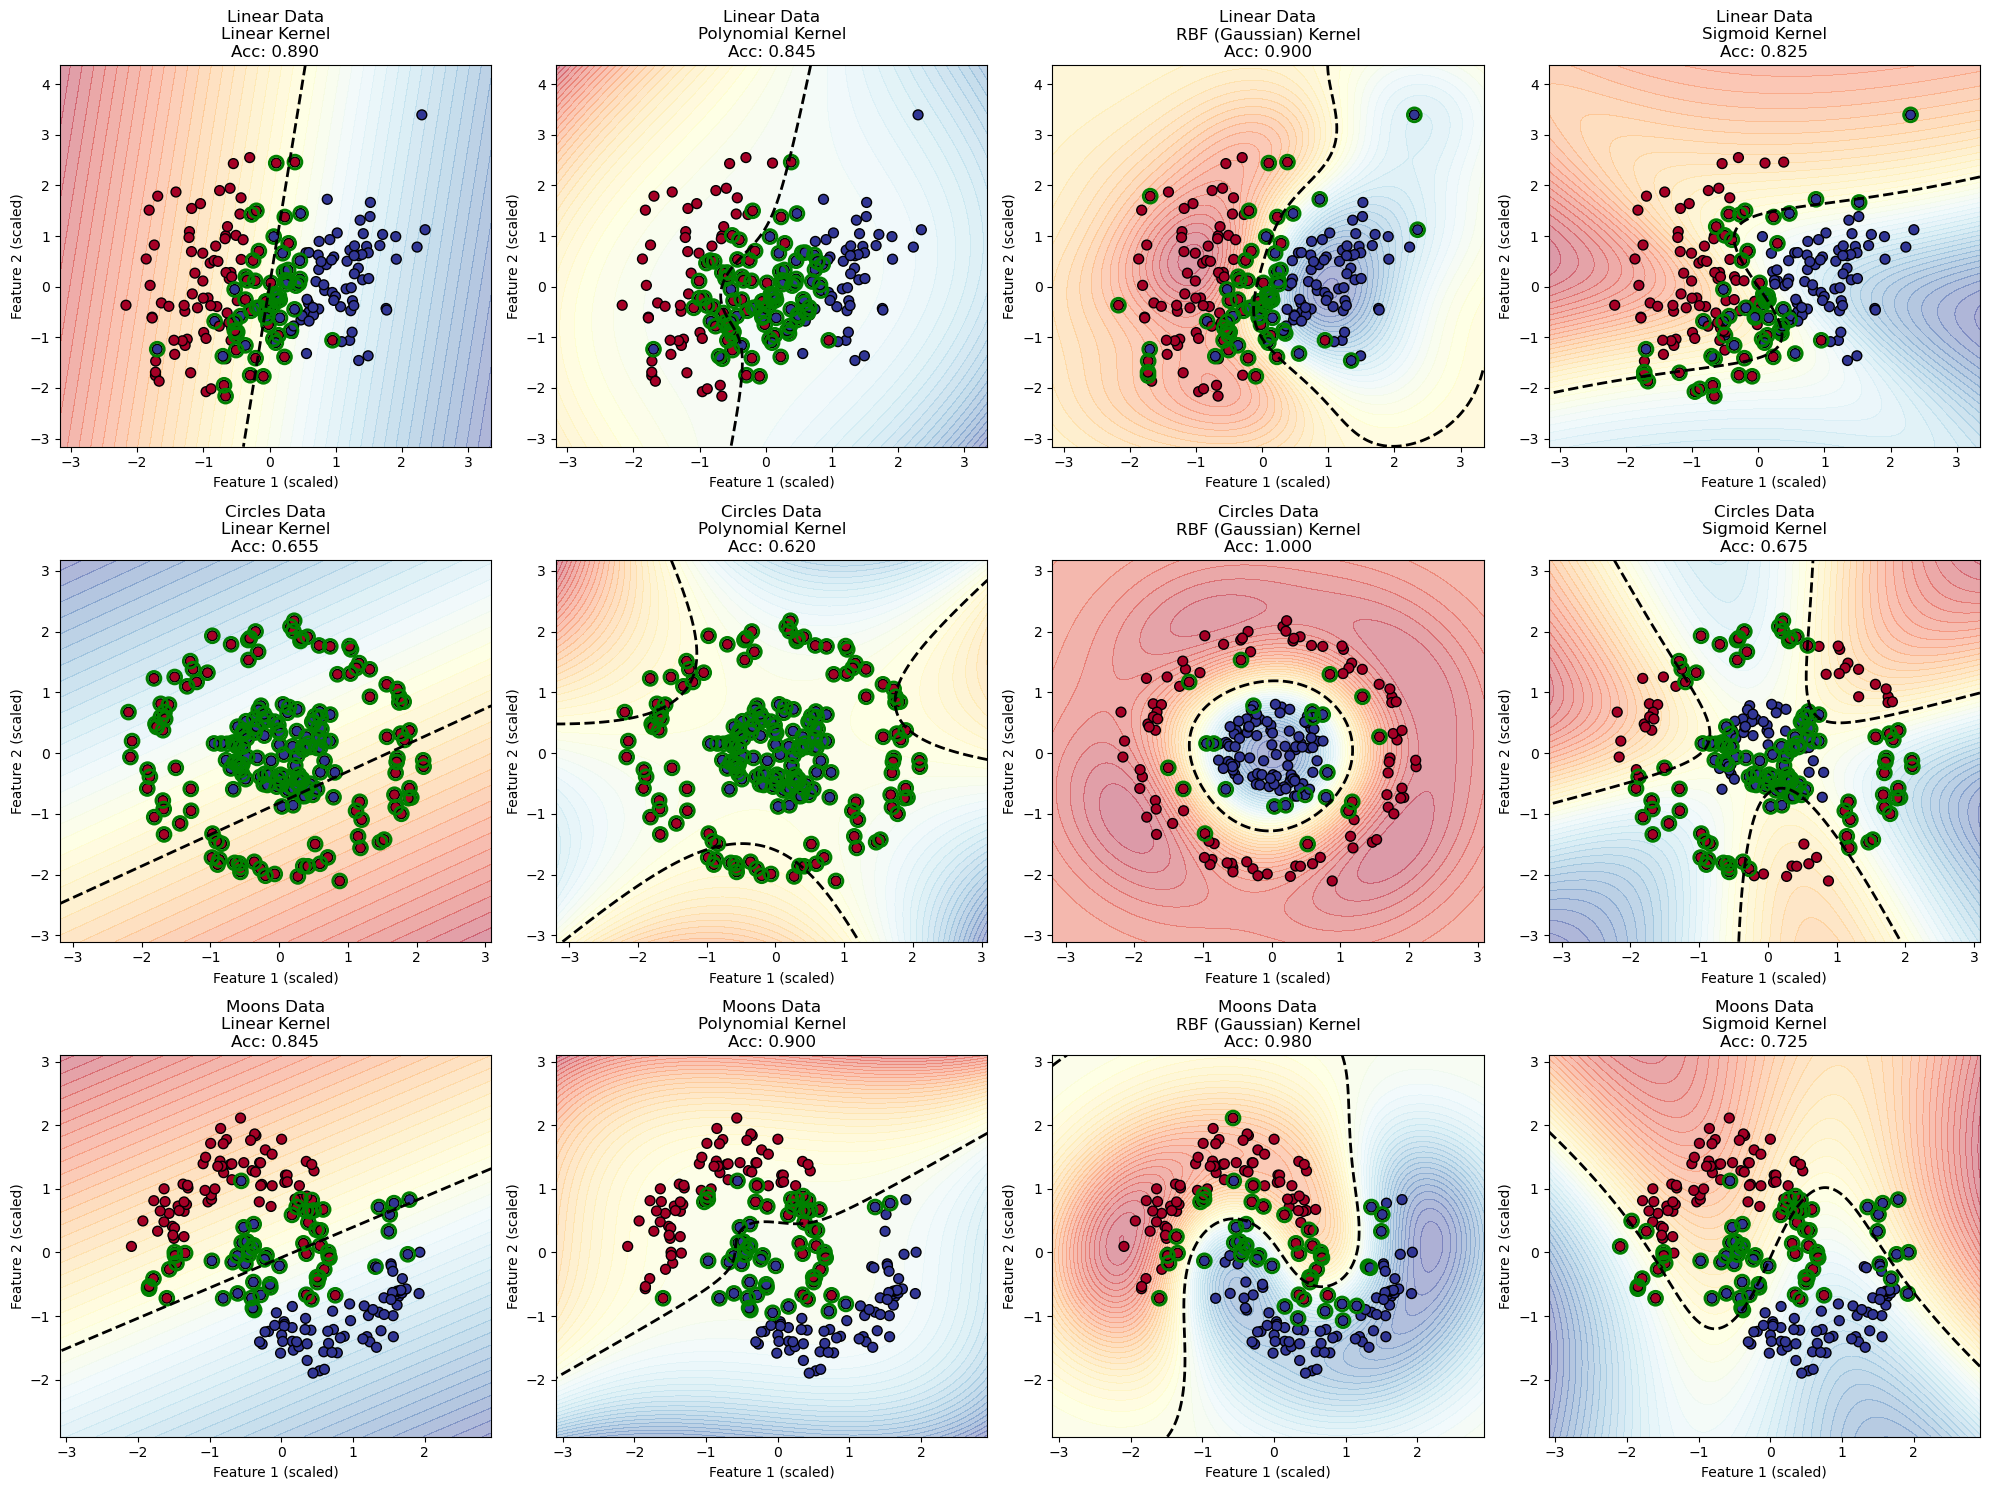


Kernel Function Insights:
• Linear: Works well for linearly separable data
• Polynomial: Can capture curved boundaries, degree controls complexity
• RBF (Radial Basis Function): Most versatile, good for complex patterns
• Sigmoid: Similar to neural networks, can be unstable


In [4]:
# 3. KERNEL FUNCTIONS IN ACTION
print("\nKERNEL FUNCTIONS DEMONSTRATION")
print("=" * 40)

# Create different types of datasets
datasets = {
    'Linear': make_classification(n_samples=200, n_features=2, n_redundant=0, 
                                 n_informative=2, n_clusters_per_class=1, 
                                 class_sep=1.2, random_state=42),
    'Circles': make_circles(n_samples=200, noise=0.1, factor=0.3, random_state=42),
    'Moons': make_moons(n_samples=200, noise=0.15, random_state=42)
}

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_names = ['Linear', 'Polynomial', 'RBF (Gaussian)', 'Sigmoid']

fig, axes = plt.subplots(3, 4, figsize=(20, 15))

for row, (dataset_name, (X, y)) in enumerate(datasets.items()):
    # Standardize features for better kernel performance
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    for col, (kernel, kernel_name) in enumerate(zip(kernels, kernel_names)):
        ax = axes[row, col]
        
        # Train SVM with specific kernel
        if kernel == 'poly':
            svm_model = svm.SVC(kernel=kernel, degree=3, C=1.0)
        elif kernel == 'rbf':
            svm_model = svm.SVC(kernel=kernel, gamma='scale', C=1.0)
        else:
            svm_model = svm.SVC(kernel=kernel, C=1.0)
        
        svm_model.fit(X_scaled, y)
        
        # Create mesh for decision boundary
        h = 0.02
        x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
        y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
        
        # Plot decision boundary
        try:
            Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            
            ax.contourf(xx, yy, Z, levels=50, alpha=0.4, cmap='RdYlBu')
            ax.contour(xx, yy, Z, levels=[0], colors='black', linestyles='--', linewidths=2)
        except:
            # Fallback for problematic kernels
            Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, levels=1, alpha=0.4, cmap='RdYlBu')
        
        # Plot data points
        scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, 
                           cmap='RdYlBu', edgecolors='black', s=50)
        
        # Highlight support vectors
        support_vectors = svm_model.support_vectors_
        ax.scatter(support_vectors[:, 0], support_vectors[:, 1], 
                  s=100, facecolors='none', edgecolors='green', linewidth=2)
        
        # Calculate accuracy
        accuracy = svm_model.score(X_scaled, y)
        
        ax.set_title(f'{dataset_name} Data\n{kernel_name} Kernel\nAcc: {accuracy:.3f}')
        ax.set_xlabel('Feature 1 (scaled)')
        ax.set_ylabel('Feature 2 (scaled)')

plt.tight_layout()
plt.show()

print("\nKernel Function Insights:")
print("• Linear: Works well for linearly separable data")
print("• Polynomial: Can capture curved boundaries, degree controls complexity")
print("• RBF (Radial Basis Function): Most versatile, good for complex patterns")
print("• Sigmoid: Similar to neural networks, can be unstable")


RBF KERNEL: EFFECT OF GAMMA PARAMETER


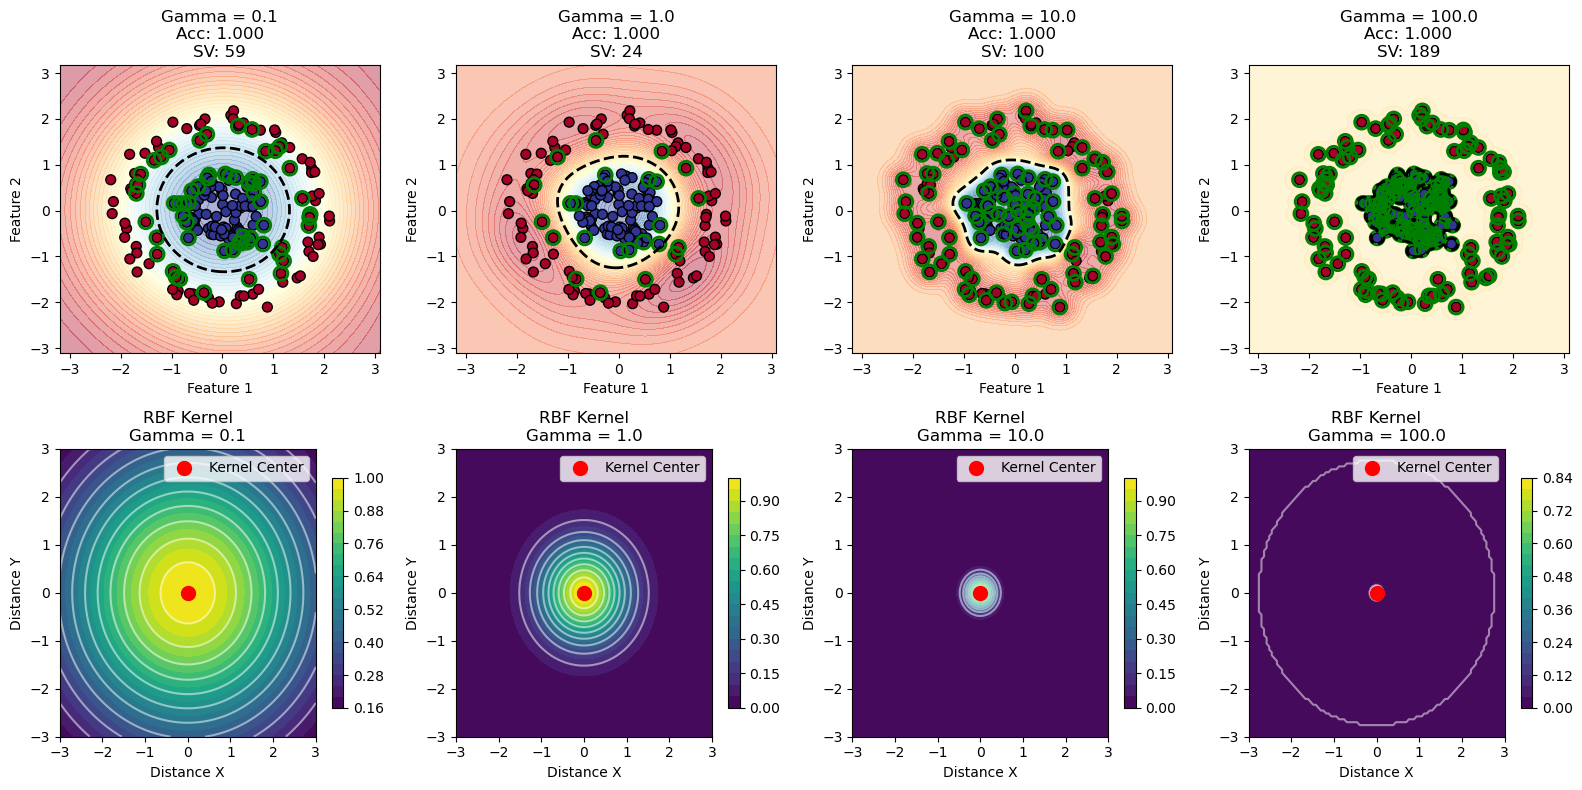


Gamma Parameter Effects:
• Low Gamma (0.1): Wide influence, smoother decision boundary
• High Gamma (100): Narrow influence, more complex boundary
• Gamma controls the 'reach' of each training example
• Higher gamma can lead to overfitting


In [5]:
# 4. RBF KERNEL GAMMA PARAMETER ANALYSIS
print("\nRBF KERNEL: EFFECT OF GAMMA PARAMETER")
print("=" * 45)

# Use circles dataset for clear demonstration
X_circles, y_circles = make_circles(n_samples=200, noise=0.1, factor=0.3, random_state=42)
scaler = StandardScaler()
X_circles_scaled = scaler.fit_transform(X_circles)

# Different gamma values
gamma_values = [0.1, 1.0, 10.0, 100.0]

plt.figure(figsize=(16, 8))

# First row: Decision boundaries
for i, gamma in enumerate(gamma_values):
    plt.subplot(2, 4, i+1)
    
    # Train RBF SVM with different gamma values
    svm_rbf = svm.SVC(kernel='rbf', gamma=gamma, C=1.0)
    svm_rbf.fit(X_circles_scaled, y_circles)
    
    # Create mesh
    h = 0.02
    x_min, x_max = X_circles_scaled[:, 0].min() - 1, X_circles_scaled[:, 0].max() + 1
    y_min, y_max = X_circles_scaled[:, 1].min() - 1, X_circles_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Plot decision boundary
    Z = svm_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, levels=50, alpha=0.4, cmap='RdYlBu')
    plt.contour(xx, yy, Z, levels=[0], colors='black', linestyles='--', linewidths=2)
    
    # Plot data and support vectors
    plt.scatter(X_circles_scaled[:, 0], X_circles_scaled[:, 1], c=y_circles, 
               cmap='RdYlBu', edgecolors='black', s=50)
    
    support_vectors = svm_rbf.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
               s=100, facecolors='none', edgecolors='green', linewidth=2)
    
    accuracy = svm_rbf.score(X_circles_scaled, y_circles)
    plt.title(f'Gamma = {gamma}\nAcc: {accuracy:.3f}\nSV: {len(support_vectors)}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Second row: RBF kernel visualization
for i, gamma in enumerate(gamma_values):
    plt.subplot(2, 4, i+5)
    
    # Show RBF kernel function for a single point
    center = np.array([0, 0])
    x_range = np.linspace(-3, 3, 100)
    y_range = np.linspace(-3, 3, 100)
    X_grid, Y_grid = np.meshgrid(x_range, y_range)
    
    # Calculate RBF kernel values
    # K(x, center) = exp(-gamma * ||x - center||^2)
    distances_squared = (X_grid - center[0])**2 + (Y_grid - center[1])**2
    kernel_values = np.exp(-gamma * distances_squared)
    
    contour = plt.contourf(X_grid, Y_grid, kernel_values, levels=20, cmap='viridis')
    plt.contour(X_grid, Y_grid, kernel_values, levels=10, colors='white', alpha=0.5)
    plt.colorbar(contour, shrink=0.8)
    
    # Mark the center
    plt.plot(0, 0, 'ro', markersize=10, label='Kernel Center')
    
    plt.title(f'RBF Kernel\nGamma = {gamma}')
    plt.xlabel('Distance X')
    plt.ylabel('Distance Y')
    plt.legend()

plt.tight_layout()
plt.show()

print("\nGamma Parameter Effects:")
print("• Low Gamma (0.1): Wide influence, smoother decision boundary")
print("• High Gamma (100): Narrow influence, more complex boundary")
print("• Gamma controls the 'reach' of each training example")
print("• Higher gamma can lead to overfitting")


SUPPORT VECTORS DETAILED ANALYSIS


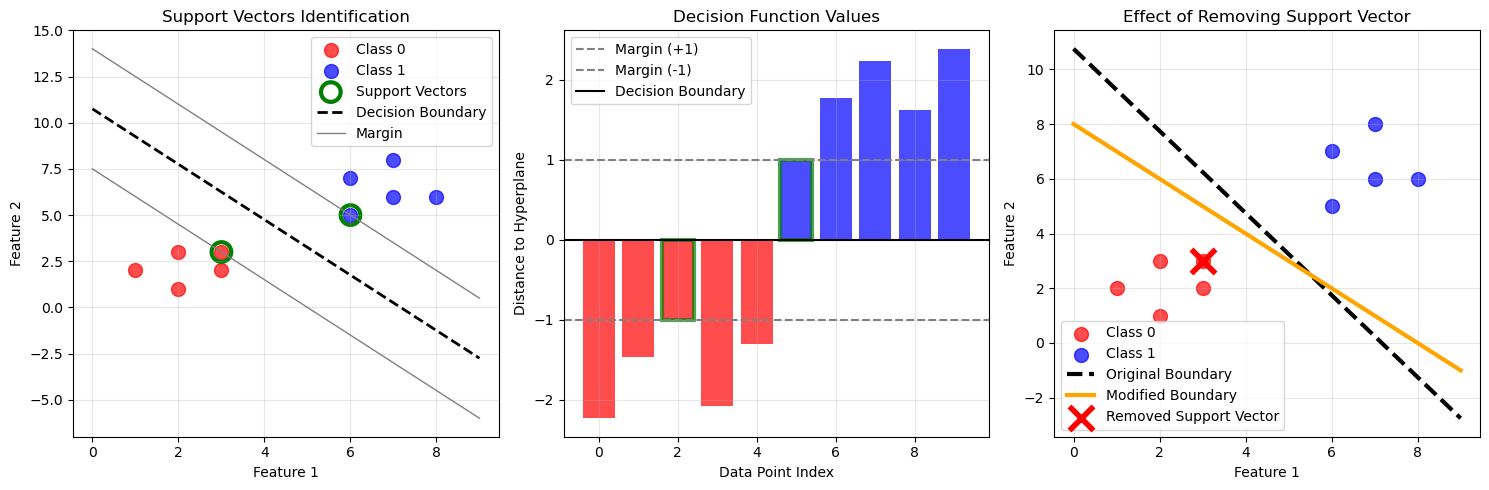


Support Vector Insights:
• Number of support vectors: 2
• Support vector indices: [2 5]
• Only support vectors determine the decision boundary
• Removing non-support vectors doesn't change the model
• Support vectors lie exactly on the margin boundaries


In [6]:
# 5. SUPPORT VECTORS ANALYSIS
print("\nSUPPORT VECTORS DETAILED ANALYSIS")
print("=" * 42)

# Create a simple dataset for clear support vector visualization
np.random.seed(42)
X_simple = np.array([[1, 2], [2, 3], [3, 3], [2, 1], [3, 2],
                     [6, 5], [7, 6], [8, 6], [6, 7], [7, 8]])
y_simple = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Train SVM
svm_simple = svm.SVC(kernel='linear', C=1.0)
svm_simple.fit(X_simple, y_simple)

plt.figure(figsize=(15, 5))

# Plot 1: Support Vectors Identification
plt.subplot(1, 3, 1)
plt.scatter(X_simple[y_simple==0, 0], X_simple[y_simple==0, 1], 
           c='red', s=100, alpha=0.7, label='Class 0')
plt.scatter(X_simple[y_simple==1, 0], X_simple[y_simple==1, 1], 
           c='blue', s=100, alpha=0.7, label='Class 1')

# Highlight support vectors
support_vectors = svm_simple.support_vectors_
support_indices = svm_simple.support_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
           s=200, facecolors='none', edgecolors='green', linewidth=3,
           label='Support Vectors')

# Draw decision boundary and margins
w = svm_simple.coef_[0]
b = svm_simple.intercept_[0]
x_line = np.linspace(0, 9, 100)
y_line = -(w[0] * x_line + b) / w[1]
y_margin_up = -(w[0] * x_line + b - 1) / w[1]
y_margin_down = -(w[0] * x_line + b + 1) / w[1]

plt.plot(x_line, y_line, 'k--', linewidth=2, label='Decision Boundary')
plt.plot(x_line, y_margin_up, 'gray', linewidth=1, label='Margin')
plt.plot(x_line, y_margin_down, 'gray', linewidth=1)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Support Vectors Identification')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Distance to hyperplane
plt.subplot(1, 3, 2)
distances = svm_simple.decision_function(X_simple)
colors = ['red' if label == 0 else 'blue' for label in y_simple]

bars = plt.bar(range(len(X_simple)), distances, color=colors, alpha=0.7)

# Highlight support vectors
for i, idx in enumerate(support_indices):
    bars[idx].set_edgecolor('green')
    bars[idx].set_linewidth(3)

plt.axhline(y=1, color='gray', linestyle='--', label='Margin (+1)')
plt.axhline(y=-1, color='gray', linestyle='--', label='Margin (-1)')
plt.axhline(y=0, color='black', linestyle='-', label='Decision Boundary')

plt.xlabel('Data Point Index')
plt.ylabel('Distance to Hyperplane')
plt.title('Decision Function Values')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Effect of removing support vectors
plt.subplot(1, 3, 3)

# Original data
plt.scatter(X_simple[y_simple==0, 0], X_simple[y_simple==0, 1], 
           c='red', s=100, alpha=0.7, label='Class 0')
plt.scatter(X_simple[y_simple==1, 0], X_simple[y_simple==1, 1], 
           c='blue', s=100, alpha=0.7, label='Class 1')

# Train without one support vector
X_modified = np.delete(X_simple, support_indices[0], axis=0)
y_modified = np.delete(y_simple, support_indices[0])

svm_modified = svm.SVC(kernel='linear', C=1.0)
svm_modified.fit(X_modified, y_modified)

# Draw both boundaries
plt.plot(x_line, y_line, 'k--', linewidth=3, label='Original Boundary')

w_mod = svm_modified.coef_[0]
b_mod = svm_modified.intercept_[0]
y_line_mod = -(w_mod[0] * x_line + b_mod) / w_mod[1]
plt.plot(x_line, y_line_mod, 'orange', linewidth=3, label='Modified Boundary')

# Mark removed support vector
removed_sv = X_simple[support_indices[0]]
plt.scatter(removed_sv[0], removed_sv[1], s=300, marker='x', 
           color='red', linewidth=4, label='Removed Support Vector')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Effect of Removing Support Vector')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nSupport Vector Insights:")
print(f"• Number of support vectors: {len(support_vectors)}")
print(f"• Support vector indices: {support_indices}")
print("• Only support vectors determine the decision boundary")
print("• Removing non-support vectors doesn't change the model")
print("• Support vectors lie exactly on the margin boundaries")


SVM PERFORMANCE COMPARISON


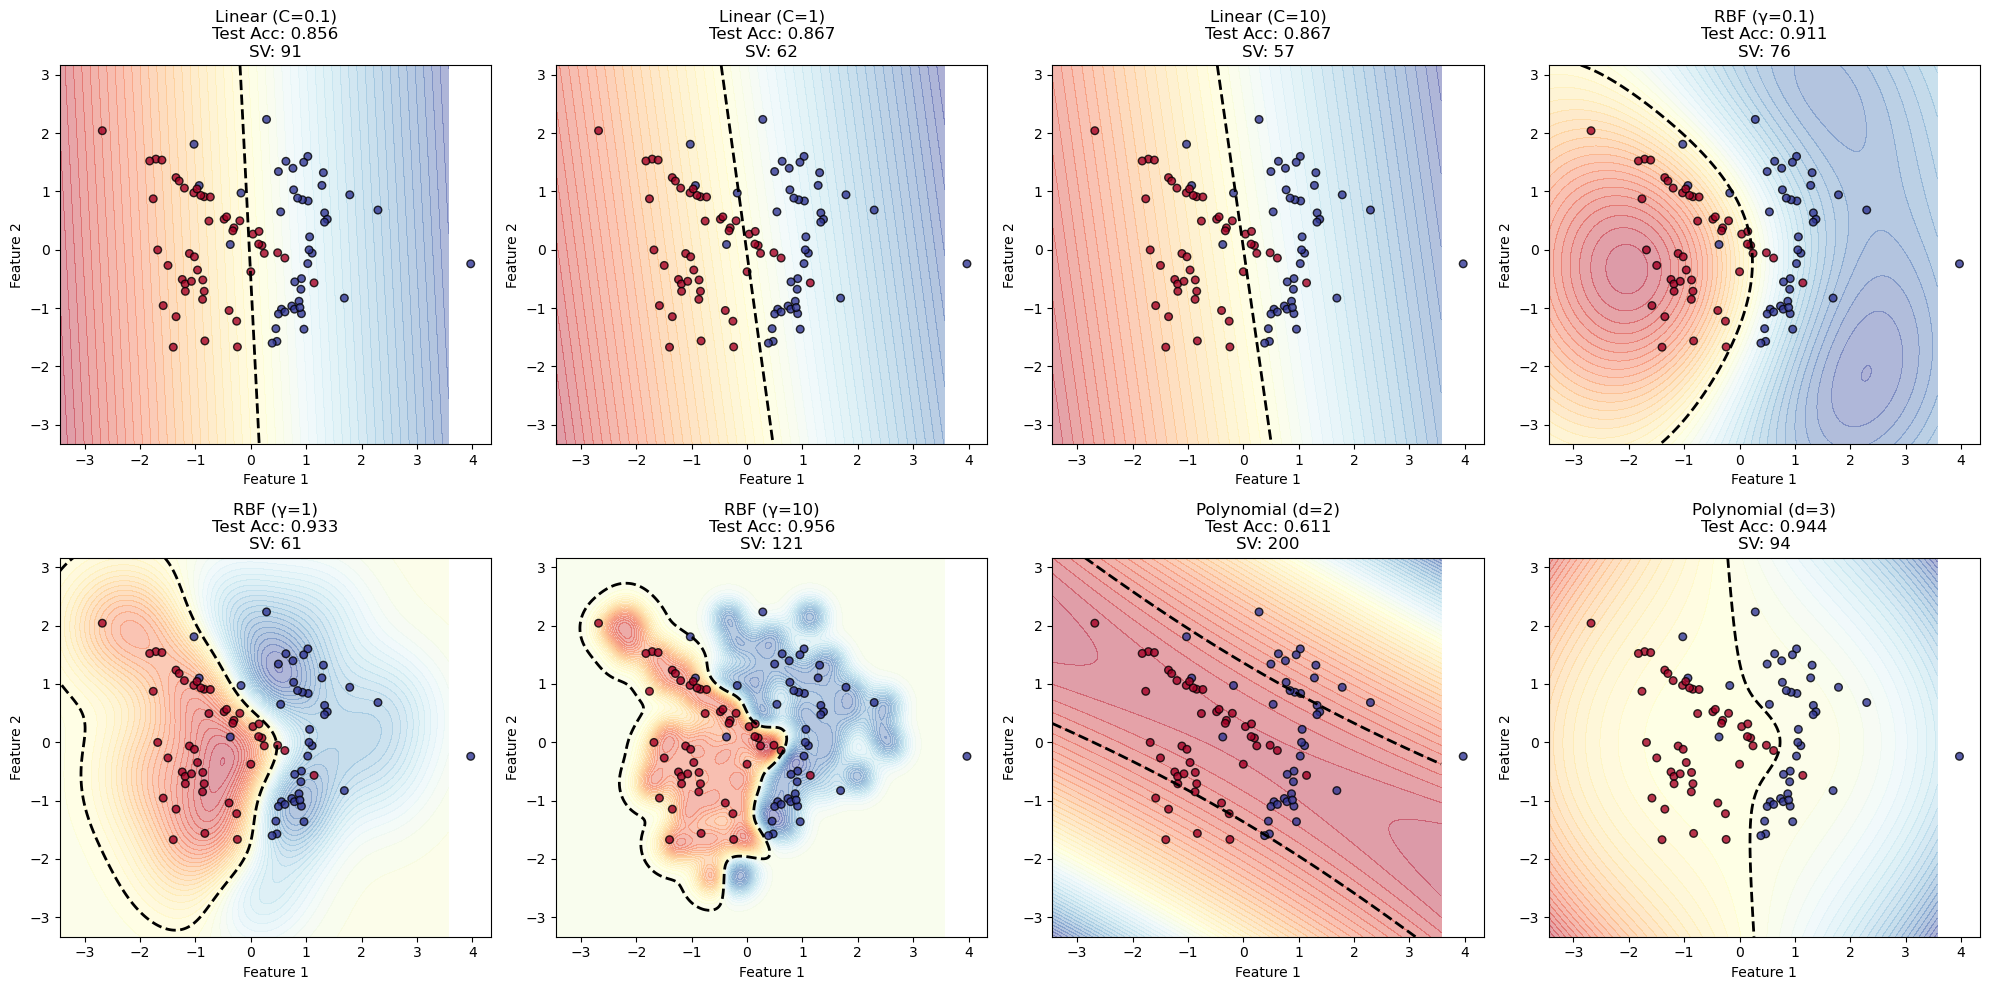


PERFORMANCE SUMMARY:
              Model  Train_Acc  Test_Acc  Support_Vectors  Overfitting
0    Linear (C=0.1)      0.905     0.856               91        0.049
1      Linear (C=1)      0.914     0.867               62        0.048
2     Linear (C=10)      0.914     0.867               57        0.048
3       RBF (γ=0.1)      0.929     0.911               76        0.017
4         RBF (γ=1)      0.943     0.933               61        0.010
5        RBF (γ=10)      0.962     0.956              121        0.006
6  Polynomial (d=2)      0.533     0.611              200       -0.078
7  Polynomial (d=3)      0.910     0.944               94       -0.035


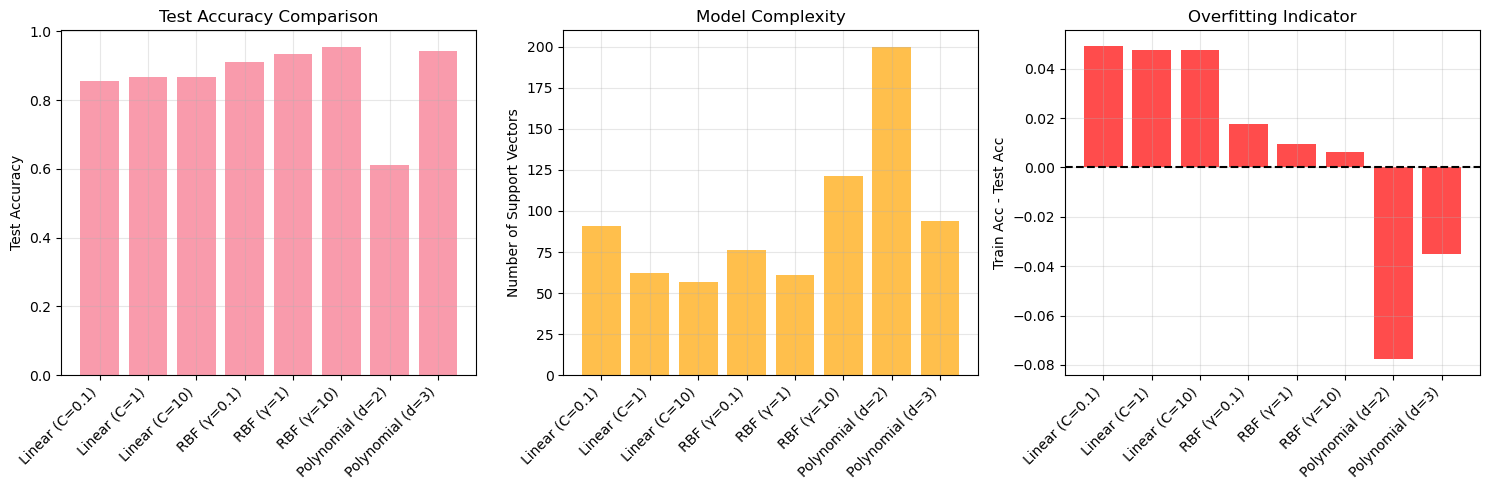


Key Observations:
• Linear SVMs work well for linearly separable data
• RBF kernels are most versatile but can overfit with high gamma
• Polynomial kernels can capture complex patterns but may be unstable
• Higher C values reduce regularization and may cause overfitting
• Number of support vectors indicates model complexity


In [7]:
# 6. COMPREHENSIVE PERFORMANCE COMPARISON
print("\nSVM PERFORMANCE COMPARISON")
print("=" * 35)

# Create a more challenging dataset
X_complex, y_complex = make_classification(n_samples=300, n_features=2, n_redundant=0,
                                         n_informative=2, n_clusters_per_class=2,
                                         class_sep=0.8, random_state=42)

# Add some noise
noise = np.random.normal(0, 0.1, X_complex.shape)
X_complex += noise

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X_complex, y_complex, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Different SVM configurations
svm_configs = [
    ('Linear (C=0.1)', svm.SVC(kernel='linear', C=0.1)),
    ('Linear (C=1)', svm.SVC(kernel='linear', C=1.0)),
    ('Linear (C=10)', svm.SVC(kernel='linear', C=10.0)),
    ('RBF (γ=0.1)', svm.SVC(kernel='rbf', gamma=0.1, C=1.0)),
    ('RBF (γ=1)', svm.SVC(kernel='rbf', gamma=1.0, C=1.0)),
    ('RBF (γ=10)', svm.SVC(kernel='rbf', gamma=10.0, C=1.0)),
    ('Polynomial (d=2)', svm.SVC(kernel='poly', degree=2, C=1.0)),
    ('Polynomial (d=3)', svm.SVC(kernel='poly', degree=3, C=1.0))
]

results = []

plt.figure(figsize=(20, 10))

for i, (name, model) in enumerate(svm_configs):
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Predictions and metrics
    train_acc = model.score(X_train_scaled, y_train)
    test_acc = model.score(X_test_scaled, y_test)
    n_support = len(model.support_vectors_)
    
    results.append({
        'Model': name,
        'Train_Acc': train_acc,
        'Test_Acc': test_acc,
        'Support_Vectors': n_support,
        'Overfitting': train_acc - test_acc
    })
    
    # Plot decision boundary
    plt.subplot(2, 4, i+1)
    
    # Create mesh
    h = 0.02
    x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
    y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    try:
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, levels=50, alpha=0.4, cmap='RdYlBu')
        plt.contour(xx, yy, Z, levels=[0], colors='black', linestyles='--', linewidths=2)
    except:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, levels=1, alpha=0.4, cmap='RdYlBu')
    
    # Plot data
    plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, 
               cmap='RdYlBu', edgecolors='black', s=30, alpha=0.8)
    
    plt.title(f'{name}\nTest Acc: {test_acc:.3f}\nSV: {n_support}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Results table
import pandas as pd
results_df = pd.DataFrame(results)
print("\nPERFORMANCE SUMMARY:")
print(results_df.round(3))

# Plot performance comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(range(len(results)), [r['Test_Acc'] for r in results], alpha=0.7)
plt.xticks(range(len(results)), [r['Model'] for r in results], rotation=45, ha='right')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.bar(range(len(results)), [r['Support_Vectors'] for r in results], alpha=0.7, color='orange')
plt.xticks(range(len(results)), [r['Model'] for r in results], rotation=45, ha='right')
plt.ylabel('Number of Support Vectors')
plt.title('Model Complexity')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.bar(range(len(results)), [r['Overfitting'] for r in results], alpha=0.7, color='red')
plt.xticks(range(len(results)), [r['Model'] for r in results], rotation=45, ha='right')
plt.ylabel('Train Acc - Test Acc')
plt.title('Overfitting Indicator')
plt.axhline(y=0, color='black', linestyle='--')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Observations:")
print("• Linear SVMs work well for linearly separable data")
print("• RBF kernels are most versatile but can overfit with high gamma")
print("• Polynomial kernels can capture complex patterns but may be unstable")
print("• Higher C values reduce regularization and may cause overfitting")
print("• Number of support vectors indicates model complexity")

## Summary and Practical Tips

### **Key Concepts Covered:**

1. **Hinge Loss Function**
   - Loss = max(0, 1 - y × f(x))
   - Encourages maximum margin separation
   - Zero loss for correct predictions with margin ≥ 1

2. **Regularization Parameter C**
   - Low C: More regularization, wider margin, simpler model
   - High C: Less regularization, narrower margin, complex model
   - Controls bias-variance tradeoff

3. **Kernel Functions**
   - **Linear**: For linearly separable data
   - **RBF (Gaussian)**: Most versatile, controlled by gamma parameter
   - **Polynomial**: Captures polynomial relationships, controlled by degree
   - **Sigmoid**: Neural network-like, can be unstable

4. **Support Vectors**
   - Data points that lie on the margin boundaries
   - Only support vectors determine the decision boundary
   - Fewer support vectors = simpler model

### **Practical Guidelines:**

**Data Preprocessing:**
- Always scale/standardize features for RBF and polynomial kernels
- Linear kernels are more robust to feature scaling

**Parameter Selection:**
- Start with RBF kernel with default parameters
- Use cross-validation for hyperparameter tuning
- Consider linear kernel for high-dimensional data

**Model Selection:**
- Linear SVM: When features >> samples or linearly separable data
- RBF SVM: Most general purpose, good default choice
- Polynomial SVM: When you suspect polynomial relationships

**Performance Indicators:**
- Many support vectors = complex decision boundary
- Large train-test accuracy gap = overfitting
- Low training accuracy = underfitting

### **Common Pitfalls:**
- Not scaling features (especially important for RBF/poly kernels)
- Using high gamma values without enough data (overfitting)
- Ignoring the number of support vectors as complexity measure